ライブラリのインポート．

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

データの読み込み．ここではすでにcompleteなデータであるものとする．

In [2]:
X = pd.read_excel("data.xlsx", index_col = 0)
display(X)

,x,y,z,u,v,dummy1,dummy2
0,1.880670,5.119414,-3.171900,0.639825,-4.229670,D,d
1,-0.522854,-6.839106,-0.301561,-1.629397,2.455704,J,a
2,2.022402,-0.413710,-0.918374,-3.410037,0.870053,I,a
3,0.426285,1.731233,-2.399366,-0.715397,-0.749180,B,a
4,3.117020,-3.601585,2.562953,-5.160408,0.209371,C,b
...,...,...,...,...,...,...,...
995,-0.563727,-2.526431,0.489600,-4.106001,4.380324,H,a
996,1.749643,-1.628650,-1.726381,-0.474737,-1.261273,F,d
997,3.272143,1.122671,-0.930049,-0.786890,-4.958666,E,d
998,1.648471,-0.658811,-0.561886,-1.318114,-2.546939,F,b


# 連続変数

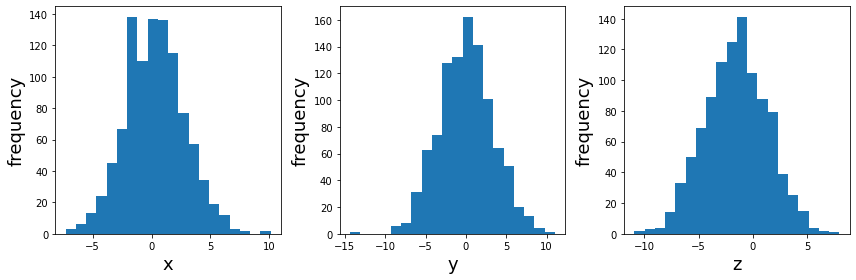

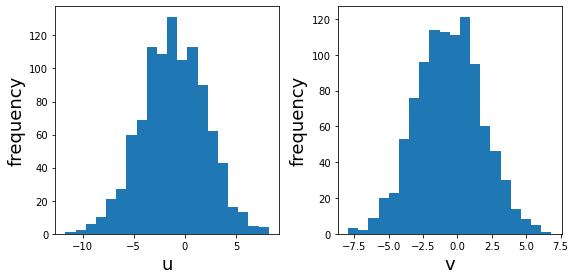

In [56]:
factor1_list = ["x", "y", "z"]
factor2_list = ["u", "v"]

# factor 1
plt.figure(figsize = (4*len(factor1_list), 4))
for idx, factor in enumerate(factor1_list):
    plt.subplot(1, len(factor1_list), idx + 1)
    plt.hist(X[factor], bins = 20, label = factor)
    plt.xlabel(factor, fontsize = 18)
    plt.ylabel("frequency", fontsize = 18)
plt.tight_layout()

# factor 2
plt.figure(figsize = (4*len(factor2_list), 4))
for idx, factor in enumerate(factor2_list):
    plt.subplot(1, len(factor2_list), idx + 1)
    plt.hist(X[factor], bins = 20, label = factor)
    plt.xlabel(factor, fontsize = 18)
    plt.ylabel("frequency", fontsize = 18)
plt.tight_layout()

# ダミー変数

,number,ratio
A,12,0.012
B,34,0.034
C,185,0.185
D,202,0.202
E,52,0.052
F,92,0.092
G,79,0.079
H,81,0.081
I,141,0.141
J,122,0.122


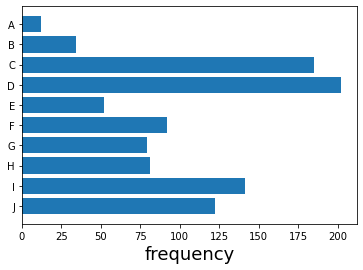

In [57]:
# 順序構造を記述したリスト，データはこの中の一部の値しか持っていないかもしれない
dummy1_full_list = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "AB"]
df_dummy1 = pd.DataFrame(index = dummy1_full_list, columns = ["number", "ratio"])
for dummy1 in dummy1_full_list:
    df_dummy1.at[dummy1, "number"] = sum(X["dummy1"] == dummy1)
    df_dummy1.at[dummy1, "ratio"] = sum(X["dummy1"] == dummy1) / len(X)
df_dummy1 = df_dummy1[df_dummy1["number"] != 0]

df_dummy1 = df_dummy1[::-1]
position = np.arange(len(df_dummy1))
plt.barh(position, df_dummy1["number"])
plt.xlabel("frequency", fontsize = 18)
plt.yticks(position, df_dummy1.index)

df_dummy1 = df_dummy1[::-1]
display(df_dummy1)

# 連続変数 vs 連続変数

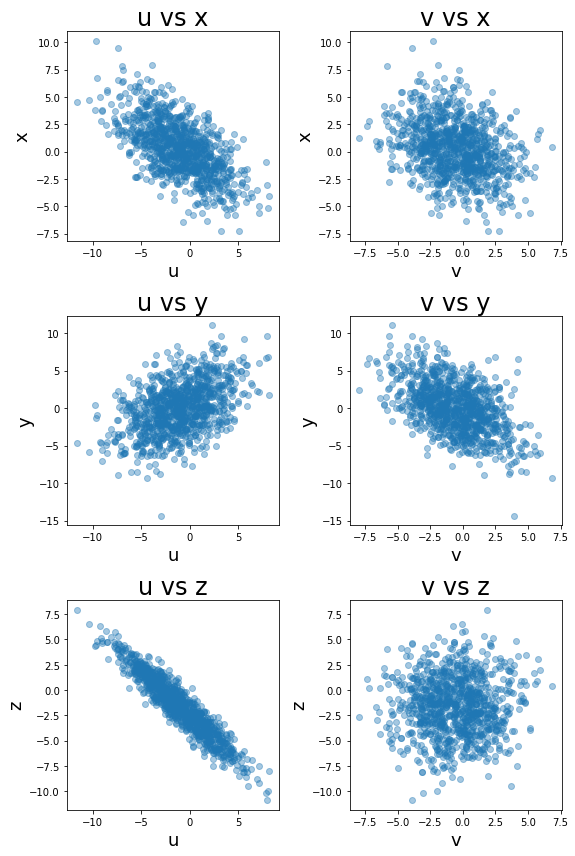

In [58]:
# factor1 vs factor2
# factor1が行となり，factor2が列となるイメージ
plt.figure(figsize = (4*len(factor2_list), 4*len(factor1_list)))
for idx1, factor1 in enumerate(factor1_list):
    for idx2, factor2, in enumerate(factor2_list):
        plt.subplot(len(factor1_list), len(factor2_list), idx1*len(factor2_list) + idx2 + 1)
        plt.scatter(X[factor2], X[factor1], alpha = 0.4)
        plt.xlabel(factor2, fontsize = 18)
        plt.ylabel(factor1 , fontsize = 18)
        plt.title(factor2 + " vs " + factor1, fontsize = 24)
plt.tight_layout()


# ダミー変数 vs ダミー変数

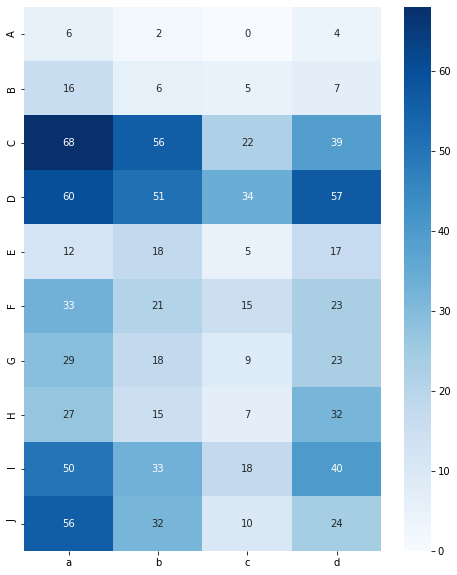

In [67]:
dummy1_full_list = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "AB"]
dummy2_full_list = ["a", "b", "c", "d", "e"]

df_dummy1_dummy2 = pd.DataFrame(index = dummy1_full_list, columns = dummy2_full_list)
for dummy1 in dummy1_full_list:
    for dummy2 in dummy2_full_list:
        df_dummy1_dummy2.at[dummy1, dummy2] = sum( (X["dummy1"] == dummy1) & (X["dummy2"] == dummy2) )
df_dummy1_dummy2 = df_dummy1_dummy2

# データの入っていない列を削除
for column in df_dummy1_dummy2.columns:
    if (df_dummy1_dummy2[column] == 0).all():
        df_dummy1_dummy2.drop(column, axis = 1, inplace = True)

# データの入っていない行を削除
for idx in df_dummy1_dummy2.index:
    if (df_dummy1_dummy2.loc[idx] == 0).all():
        df_dummy1_dummy2.drop(idx, axis = 0, inplace = True)
#display(df_dummy1_dummy2)


plt.figure(figsize = (2*len(df_dummy1_dummy2.columns), len(df_dummy1_dummy2.index)))
sns.heatmap(df_dummy1_dummy2.astype(int), annot = True, fmt = "g", cmap = "Blues")
plt.savefig("heat_map.jpg")

# 連続変数 vs ダミー変数

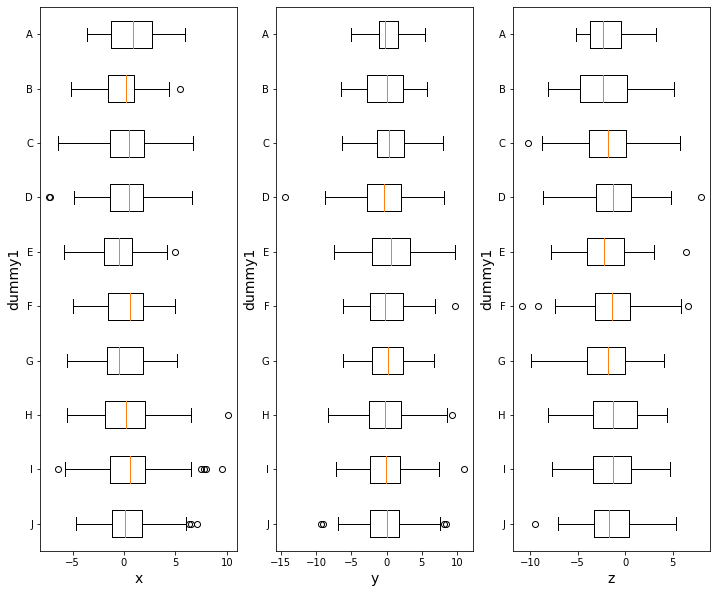

In [80]:
factor_list = ["x", "y", "z"]

dummy_full_list = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "AB"]
df_dummy = pd.DataFrame(index = dummy1_full_list, columns = ["number", "ratio"])
for dummy in dummy_full_list:
    df_dummy.at[dummy, "number"] = sum(X["dummy1"] == dummy)
    df_dummy.at[dummy, "ratio"] = sum(X["dummy1"] == dummy) / len(X)
df_dummy = df_dummy[df_dummy["number"] != 0]

df_dummy = df_dummy[::-1]
plt.figure(figsize = (4*len(factor_list), len(df_dummy)))
for idx_factor, factor in enumerate(factor_list):
    plt.subplot(1, len(factor_list), idx_factor + 1)
    x_dummy = [[] for _ in range(len(df_dummy.index))]
    for idx_dummy, dummy in enumerate(df_dummy.index):
        x_dummy[idx_dummy] = X[X["dummy1"] == dummy][factor]
    plt.boxplot(x_dummy, vert = False, labels = df_dummy.index)
    plt.xlabel(factor, fontsize = 14)
    plt.ylabel("dummy1", fontsize = 14)
df_dummy = df_dummy[::-1]

# ここまでの結果を関数にする

## 連続変数

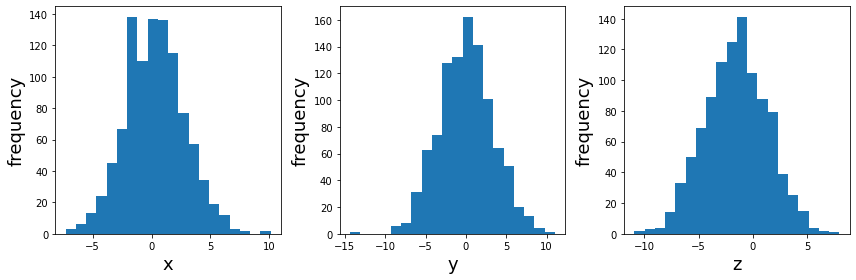

In [4]:
def get_hist(X, factor_list): # X：テーブル，factor_list：注目するファクターのリスト
    plt.figure(figsize = (4*len(factor_list), 4))
    for idx, factor in enumerate(factor_list):
        plt.subplot(1, len(factor_list), idx + 1)
        hist = plt.hist(X[factor], bins = 20, label = factor)
        plt.xlabel(factor, fontsize = 18)
        plt.ylabel("frequency", fontsize = 18)
    plt.tight_layout()
    return hist

factor1_list = ["x", "y", "z"]
hist_factor1 = get_hist(X, factor1_list)


## ダミー変数

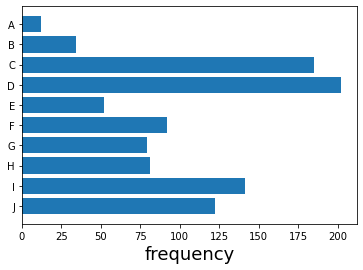

In [7]:
def get_bar(X, dummy, dummy_full_list = []): # dummyは注目するダミー変数，dummy_full_listはそのダミー変数の順序を決めたリスト
    if len(dummy_full_list) == 0:
        dummy_full_list = X[dummy].unique() # dummy_full_listがない場合は適当に作成
    df_dummy = pd.DataFrame(index = dummy_full_list, columns = ["number", "ratio"])
    for entity in dummy_full_list:
        df_dummy.at[entity, "number"] = sum(X[dummy] == entity)
        df_dummy.at[entity, "ratio"] = sum(X[dummy] == entity) / len(X)
    df_dummy = df_dummy[df_dummy["number"] != 0] # 0個であるような要素は削除
    df_dummy = df_dummy[::-1] # 棒グラフプロットのため，インデックスの逆順に並べ直す
    
    # 棒グラフプロット
    position = np.arange(len(df_dummy))
    plt.barh(position, df_dummy["number"])
    plt.xlabel("frequency", fontsize = 18)
    plt.yticks(position, df_dummy.index)
    
    df_dummy = df_dummy[::-1] # テーブルとしては元の順番の方がよい
    return df_dummy

dummy1_full_list = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "AB"]
df_dummy1 = get_bar(X, "dummy1", dummy1_full_list)

# 連続変数 vs 連続変数

{'u vs x':             u         x
 0    0.639825  1.880670
 1   -1.629397 -0.522854
 2   -3.410037  2.022402
 3   -0.715397  0.426285
 4   -5.160408  3.117020
 ..        ...       ...
 995 -4.106001 -0.563727
 996 -0.474737  1.749643
 997 -0.786890  3.272143
 998 -1.318114  1.648471
 999  5.548332 -1.647258
 
 [1000 rows x 2 columns],
 'v vs x':             v         x
 0   -4.229670  1.880670
 1    2.455704 -0.522854
 2    0.870053  2.022402
 3   -0.749180  0.426285
 4    0.209371  3.117020
 ..        ...       ...
 995  4.380324 -0.563727
 996 -1.261273  1.749643
 997 -4.958666  3.272143
 998 -2.546939  1.648471
 999 -4.776835 -1.647258
 
 [1000 rows x 2 columns],
 'u vs y':             u         y
 0    0.639825  5.119414
 1   -1.629397 -6.839106
 2   -3.410037 -0.413710
 3   -0.715397  1.731233
 4   -5.160408 -3.601585
 ..        ...       ...
 995 -4.106001 -2.526431
 996 -0.474737 -1.628650
 997 -0.786890  1.122671
 998 -1.318114 -0.658811
 999  5.548332  1.948526
 
 [1000 rows 

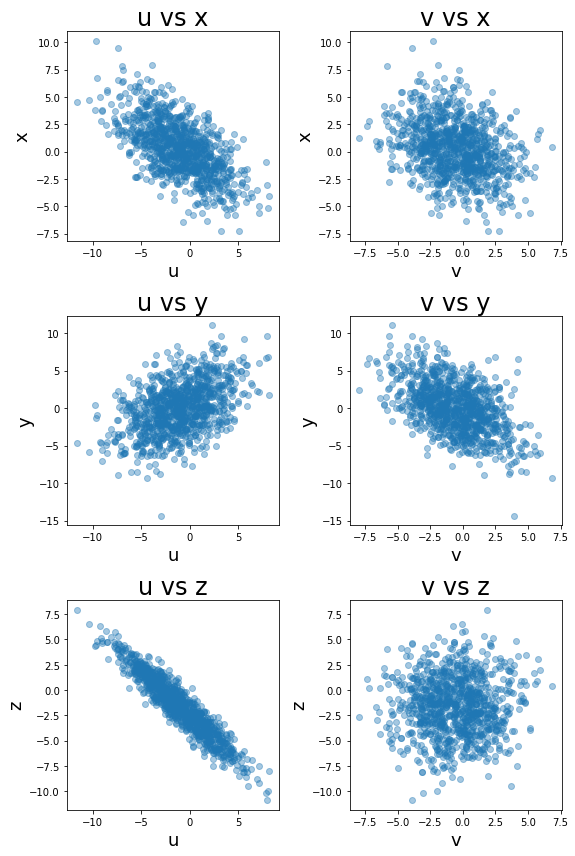

In [10]:
def get_scatter(X, factor1_list, factor2_list):
    df_factor1_factor2 = {}
    # factor1 vs factor2
    # factor1が行となり，factor2が列となるイメージ
    plt.figure(figsize = (4*len(factor2_list), 4*len(factor1_list)))
    for idx1, factor1 in enumerate(factor1_list):
        for idx2, factor2, in enumerate(factor2_list):
            df_factor1_factor2[factor2 + " vs " + factor1] = X[[factor2, factor1]]
            plt.subplot(len(factor1_list), len(factor2_list), idx1*len(factor2_list) + idx2 + 1)
            plt.scatter(X[factor2], X[factor1], alpha = 0.4)
            plt.xlabel(factor2, fontsize = 18)
            plt.ylabel(factor1 , fontsize = 18)
            plt.title(factor2 + " vs " + factor1, fontsize = 24)
    plt.tight_layout()
    return df_factor1_factor2

factor1_list = ["x", "y", "z"]
factor2_list = ["u", "v"]
df_factor1_factor2 = get_scatter(X, factor1_list, factor2_list)
df_factor1_factor2    

## ダミー変数 vs ダミー変数

,a,b,c,d
A,6,2,0,4
B,16,6,5,7
C,68,56,22,39
D,60,51,34,57
E,12,18,5,17
F,33,21,15,23
G,29,18,9,23
H,27,15,7,32
I,50,33,18,40
J,56,32,10,24


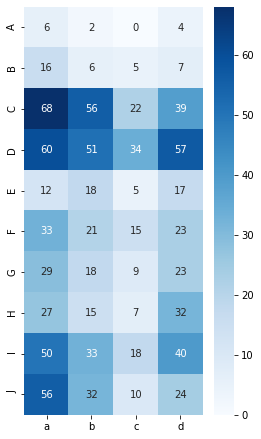

In [14]:
def get_heat_map(X, dummy1, dummy2, dummy1_full_list, dummy2_full_list):
    if len(dummy1_full_list) == 0:
        dummy1_full_list = X[dummy1].unique()
    if len(dummy2_full_list) == 0:
        dummy2_full_list = X[dummy2].unique()

    df_dummy1_dummy2 = pd.DataFrame(index = dummy1_full_list, columns = dummy2_full_list)
    for entity1 in dummy1_full_list:
        for entity2 in dummy2_full_list:
            df_dummy1_dummy2.at[entity1, entity2] = sum( (X[dummy1] == entity1) & (X[dummy2] == entity2) )

    # データの入っていない列を削除
    for column in df_dummy1_dummy2.columns:
        if (df_dummy1_dummy2[column] == 0).all():
            df_dummy1_dummy2.drop(column, axis = 1, inplace = True)

    # データの入っていない行を削除
    for idx in df_dummy1_dummy2.index:
        if (df_dummy1_dummy2.loc[idx] == 0).all():
            df_dummy1_dummy2.drop(idx, axis = 0, inplace = True)
            
    plt.figure(figsize = (len(df_dummy1_dummy2.columns), 0.75*len(df_dummy1_dummy2.index)))
    sns.heatmap(df_dummy1_dummy2.astype(int), annot = True, fmt = "g", cmap = "Blues")
    plt.savefig("heat_map.jpg")
    
    return df_dummy1_dummy2

dummy1_full_list = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "AB"]
dummy2_full_list = ["a", "b", "c", "d", "e"]
df_dummy1_dummy2 = get_heat_map(X, "dummy1", "dummy2", dummy1_full_list, dummy2_full_list)
display(df_dummy1_dummy2)

## 連続変数 vs ダミー変数

x
122 122


1     -0.522854
8      4.371939
11    -2.520082
14     3.988075
16     1.457159
         ...   
937    2.697487
953    2.642746
964   -2.984957
966    2.592885
981    2.763670
Name: x, Length: 122, dtype: float64

141 141


2      2.022402
7      1.821179
9     -0.611509
20    -1.366534
25     2.078058
         ...   
982    1.551830
984   -1.725169
988    1.061056
992   -1.662451
993   -1.344966
Name: x, Length: 141, dtype: float64

81 81


18     3.553571
21    -3.315763
43    -0.921545
57    -2.313890
76    -1.215234
         ...   
938    0.526146
947   -2.080096
954    3.255218
955    2.045251
995   -0.563727
Name: x, Length: 81, dtype: float64

79 79


5      2.145899
26    -0.926654
49     4.609730
88    -2.200094
92    -1.146982
         ...   
967    2.291639
972   -0.737036
980    1.546639
983   -0.447325
994    1.307507
Name: x, Length: 79, dtype: float64

92 92


12    -1.531342
31    -3.783088
33     0.744917
37     3.509256
50    -0.037484
         ...   
978   -0.676421
985    0.004713
986    0.552862
996    1.749643
998    1.648471
Name: x, Length: 92, dtype: float64

52 52


38     1.117007
55    -0.147369
84    -1.954117
94    -0.944955
115   -2.384437
141   -1.185352
200   -3.741261
212    0.573865
216    0.678124
223   -1.134241
242   -0.086123
265   -1.347558
279    0.295399
285   -1.512301
306    3.195327
333    2.602828
375   -1.468292
402   -0.376616
455   -1.944202
458   -2.932969
463   -0.327703
468   -1.554731
475    0.520383
482    0.803406
515   -0.610286
522   -2.798307
526   -2.943143
543   -1.884407
554    1.645607
563   -0.438024
569   -0.908082
603    4.998730
624   -2.527126
644   -4.600151
653   -2.269061
676    0.627145
694   -3.053802
703    1.676837
719    1.292539
773   -5.802558
787    0.407079
796    0.851821
820   -2.290520
866    0.825565
873   -0.287518
875    2.685408
906    4.160053
936   -2.961128
941   -1.476075
942   -0.618823
950    1.612771
997    3.272143
Name: x, dtype: float64

202 202


0      1.880670
10    -1.376658
13     0.637024
15     0.299795
22    -2.163566
         ...   
973   -0.678394
974    3.750966
976   -1.503533
990   -1.809858
991   -0.311482
Name: x, Length: 202, dtype: float64

185 185


4      3.117020
6     -2.075028
17     3.628824
19    -2.068308
35    -3.785527
         ...   
963    2.495428
965   -3.846037
977   -3.642805
987   -0.749538
989    6.394368
Name: x, Length: 185, dtype: float64

34 34


3      0.426285
48    -1.095581
51    -4.560773
97     0.843976
119    1.874062
129    2.796286
183   -1.506654
188    0.246254
211    4.339230
225    1.130238
283   -0.578499
326    0.336815
346    0.073612
361    3.540800
390   -0.266715
421    1.449470
426   -0.203137
446   -1.333880
509   -5.169443
548    0.413314
560    0.858028
588   -4.831558
638    0.268748
641   -3.085504
645    3.719789
660   -1.578069
695    0.949502
746    1.026413
747   -1.044041
749   -4.813379
760    5.462779
833   -2.333466
959   -1.566828
999   -1.647258
Name: x, dtype: float64

3 12


136    1.460664
301    0.272116
359   -1.207306
395    5.103720
417    4.232424
594    2.285571
607    1.981479
772   -1.450729
852   -0.282345
856   -3.581003
893    5.912857
902   -2.724996
Name: x, dtype: float64

y
122 122


1     -6.839106
8     -2.782880
11    -1.590018
14     1.767789
16    -2.741499
         ...   
937    3.295603
953   -1.235565
964    3.963056
966    1.759074
981    3.713760
Name: y, Length: 122, dtype: float64

141 141


2     -0.413710
7     -3.182190
9      4.675363
20    -5.659022
25     0.778421
         ...   
982    2.629854
984   -5.163678
988   -1.052223
992    0.065512
993   -2.837395
Name: y, Length: 141, dtype: float64

81 81


18    -2.629478
21    -0.272705
43    -5.119550
57    -4.580401
76    -4.464112
         ...   
938    3.501470
947    9.252886
954    1.125158
955   -2.279950
995   -2.526431
Name: y, Length: 81, dtype: float64

79 79


5     -1.191258
26     1.929140
49    -2.448286
88     2.986369
92     0.836809
         ...   
967    3.315609
972    4.090732
980   -3.549789
983    3.769830
994    2.399006
Name: y, Length: 79, dtype: float64

92 92


12    -0.256940
31     2.634727
33    -3.990608
37     6.876260
50    -1.534986
         ...   
978   -1.789497
985   -1.495704
986   -0.209630
996   -1.628650
998   -0.658811
Name: y, Length: 92, dtype: float64

52 52


38     2.501480
55     2.870130
84     4.439349
94     2.014485
115   -1.552450
141   -3.880119
200    3.342150
212   -1.073675
216    1.288499
223    1.382631
242   -0.606330
265   -5.200325
279    3.226148
285   -2.079084
306    0.419119
333   -0.737428
375    0.332286
402    0.482952
455   -6.081276
458    5.215397
463    1.807318
468    5.402760
475   -2.331725
482   -0.866168
515   -1.331805
522    9.653214
526    1.547684
543    2.440782
554   -3.542556
563   -6.429975
569   -1.809828
603   -4.521409
624    0.825797
644    4.632293
653   -7.482694
676   -0.993348
694   -0.956277
703   -2.954585
719    1.402276
773    3.359402
787   -5.820009
796    3.978500
820   -2.078065
866    4.736619
873    3.743925
875   -3.249330
906   -4.838185
936    6.086130
941    4.564138
942    4.727031
950    5.609806
997    1.122671
Name: y, dtype: float64

202 202


0      5.119414
10     1.458313
13     4.836733
15    -0.920956
22     3.576014
         ...   
973   -2.755555
974   -3.834408
976   -2.866342
990    4.183097
991    4.193118
Name: y, Length: 202, dtype: float64

185 185


4     -3.601585
6     -3.572785
17    -2.944787
19     0.621877
35    -4.293937
         ...   
963   -1.020361
965    6.823913
977    2.589020
987    0.062061
989    1.096620
Name: y, Length: 185, dtype: float64

34 34


3      1.731233
48    -0.759035
51     0.156321
97     0.336592
119   -3.435730
129   -4.592344
183    1.473616
188    4.456048
211   -1.988091
225   -6.286441
283    3.074013
326   -4.370722
346   -0.807240
361    3.807506
390    2.130443
421   -2.848609
426   -2.710640
446   -2.759811
509    2.348375
548   -0.548922
560    5.471914
588    5.007250
638   -6.432251
641    4.959543
645   -6.241918
660    5.789517
695   -1.648267
746    1.062610
747   -2.081588
749    3.490152
760    0.035438
833   -5.009769
959    2.056326
999    1.948526
Name: y, dtype: float64

3 12


136   -4.974311
301    5.479163
359    1.888611
395    1.134232
417    2.861781
594   -0.234061
607   -0.192039
772   -0.929288
852    1.513363
856   -1.698759
893   -3.757361
902   -0.258275
Name: y, dtype: float64

z
122 122


1     -0.301561
8      5.258581
11    -3.965412
14    -2.629146
16     1.801882
         ...   
937   -3.490033
953   -3.829231
964   -0.381981
966    4.137826
981    0.510067
Name: z, Length: 122, dtype: float64

141 141


2     -0.918374
7      1.291231
9     -5.280131
20     0.580824
25    -0.003595
         ...   
982   -4.180077
984   -1.083449
988    0.927440
992   -0.837485
993   -2.310408
Name: z, Length: 141, dtype: float64

81 81


18    -0.799806
21    -2.287784
43     2.842901
57     0.962641
76     2.078312
         ...   
938   -1.421110
947   -8.085378
954    1.726728
955    3.137524
995    0.489600
Name: z, Length: 81, dtype: float64

79 79


5     -0.887381
26    -3.757341
49    -0.045021
88    -3.476366
92    -0.979799
         ...   
967    2.514283
972   -4.021947
980    3.863238
983   -5.133268
994    1.670636
Name: z, Length: 79, dtype: float64

92 92


12    -1.462439
31    -5.014466
33    -0.075369
37    -3.627942
50     1.540473
         ...   
978   -2.143460
985   -2.067911
986   -2.568221
996   -1.726381
998   -0.561886
Name: z, Length: 92, dtype: float64

52 52


38    -2.050803
55    -2.722017
84    -6.626058
94    -4.273233
115   -2.852571
141   -2.781312
200   -7.786497
212    0.599997
216    0.212420
223   -5.052262
242   -2.153828
265   -2.202263
279   -3.407989
285   -6.174704
306    0.859936
333   -0.011515
375   -2.573531
402   -2.971157
455   -3.804562
458   -5.008489
463   -1.603604
468   -6.804639
475    0.106992
482   -2.138395
515   -2.182315
522   -5.006746
526   -2.662141
543   -2.617940
554    3.042851
563    0.910278
569   -3.923156
603    6.371634
624    1.491733
644   -7.686941
653    1.031183
676   -2.335155
694   -3.559704
703   -0.752005
719   -0.805905
773   -6.342739
787    2.391589
796   -4.382676
820   -1.725235
866   -3.191151
873   -0.546373
875    2.734262
906   -0.189313
936   -2.145616
941    0.762834
942   -4.888278
950   -5.587249
997   -0.930049
Name: z, dtype: float64

202 202


0     -3.171900
10    -3.462730
13    -1.890276
15     2.456519
22    -4.541243
         ...   
973   -1.837551
974   -2.330421
976   -0.691232
990   -0.539578
991    0.228536
Name: z, Length: 202, dtype: float64

185 185


4      2.562953
6      1.056413
17     2.880740
19    -1.390651
35     0.383427
         ...   
963   -3.356859
965   -8.069705
977   -5.782748
987   -2.226889
989    2.161900
Name: z, Length: 185, dtype: float64

34 34


3     -2.399366
48    -4.181137
51    -5.895622
97     1.074316
119    3.130392
129    5.098944
183   -2.290142
188   -4.117051
211    0.281988
225    0.905910
283   -6.668458
326   -3.168467
346   -2.725977
361   -2.349480
390   -0.663754
421   -1.141599
426   -0.666506
446   -4.574619
509   -5.835789
548   -0.193568
560   -5.756600
588   -7.953728
638   -0.798601
641   -6.333667
645    2.064308
660   -8.138281
695    1.802065
746    0.252312
747   -1.630499
749   -4.865830
760    0.175269
833    1.670552
959   -3.514188
999   -6.066406
Name: z, dtype: float64

3 12


136   -0.585449
301   -5.209905
359   -3.411157
395    3.276000
417   -1.762553
594   -2.442026
607   -3.383515
772    0.141601
852   -4.456043
856   -2.140196
893    2.764308
902   -4.481980
Name: z, dtype: float64

,dummy1,x,y,z
0,J,NaN,NaN,NaN
1,J,-0.522854,-6.83911,-0.301561
2,J,NaN,NaN,NaN
3,J,NaN,NaN,NaN
4,J,NaN,NaN,NaN
...,...,...,...,...
995,B,NaN,NaN,NaN
996,B,NaN,NaN,NaN
997,A,NaN,NaN,NaN
998,A,NaN,NaN,NaN


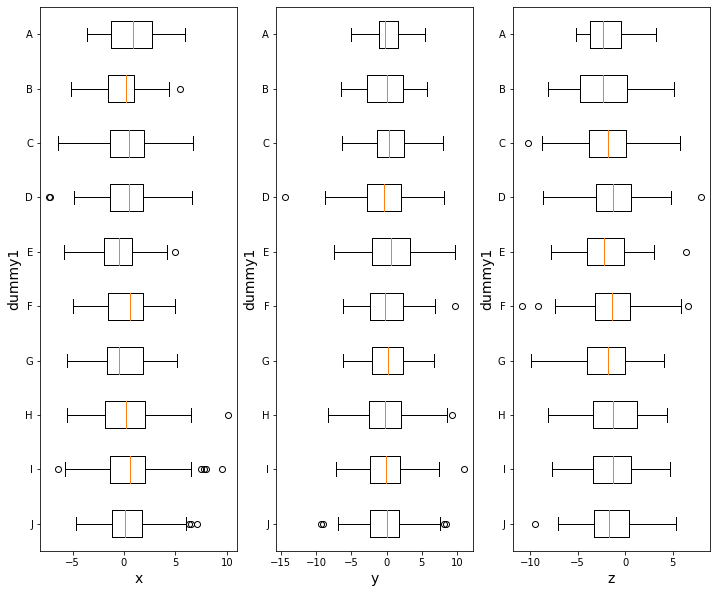

In [33]:
def get_boxplot(X, factor_list, dummy, dummy_full_list):
    df_dummy = pd.DataFrame(index = dummy1_full_list, columns = ["number", "ratio"])
    for entity in dummy_full_list:
        df_dummy.at[entity, "number"] = sum(X[dummy] == entity)
        df_dummy.at[entity, "ratio"] = sum(X[dummy] == entity) / len(X)
    df_dummy = df_dummy[df_dummy["number"] != 0]

    df_dummy = df_dummy[::-1] # プロットのためダミー変数のテーブルを逆順に
    plt.figure(figsize = (4*len(factor_list), len(df_dummy)))
    
    
    df_factor_dummy = pd.DataFrame(index = X.index, columns = [dummy] + factor_list)
    
    for idx_factor, factor in enumerate(factor_list):
        print(factor)
        plt.subplot(1, len(factor_list), idx_factor + 1)
        x_dummy = [[] for _ in range(len(df_dummy.index))]
        idx_start = 0
        for idx_dummy, entity in enumerate(df_dummy.index):
            x_dummy[idx_dummy] = X[X[dummy] == entity][factor]
            df_factor_dummy.loc[idx_start:idx_start + len(x_dummy[idx_dummy]), dummy] = entity
            df_factor_dummy.loc[idx_start:idx_start + len(x_dummy[idx_dummy]), factor] = X[X[dummy] == entity][factor]
            print(len(df_factor_dummy.loc[idx_start:idx_start + len(x_dummy[idx_dummy])-1, factor]), len(X[X[dummy] == entity]))
            display(X[X[dummy] == entity][factor])
            idx_start += len(x_dummy[idx_dummy]) + 1
        plt.boxplot(x_dummy, vert = False, labels = df_dummy.index)
        plt.xlabel(factor, fontsize = 14)
        plt.ylabel(dummy, fontsize = 14)
    df_dummy = df_dummy[::-1]
    
    return df_factor_dummy
    
factor_list = ["x", "y", "z"]
dummy_full_list = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "AB"]

df_factor_dummy = get_boxplot(X, factor_list, "dummy1", dummy_full_list)
display(df_factor_dummy)

In [20]:
list1 = ["a"]
list2 = ["b", "b"]
list1 + list2

['a', 'b', 'b']